### k-최근접 이웃의 한계

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


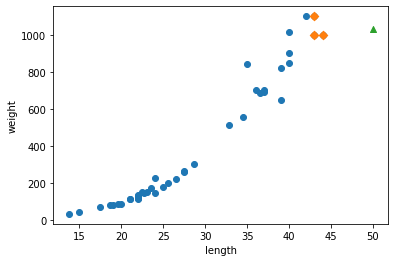

In [5]:
import matplotlib.pyplot as plt
distance, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
print(np.mean(train_target[indexes])) # k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균

1033.3333333333333


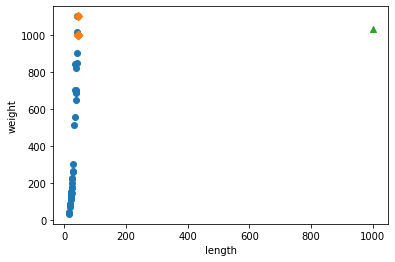

In [7]:
new = knr.predict([[1000]]) # 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있음
distance, indexes = knr.kneighbors([[1000]]) 
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(1000,new,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀

In [8]:
from sklearn.linear_model import LinearRegression # 임포트
lr = LinearRegression() # 객체생성
lr.fit(train_input, train_target) # 선형 회귀 모델 훈련
print(lr.predict([[50]])) # 50에 대한 예측

[1241.83860323]


In [9]:
print(lr.coef_, lr.intercept_) #coef_: 기울기, 가중치

[39.01714496] -709.0186449535477


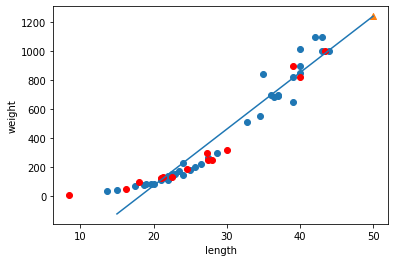

In [14]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) # 15에서 50까지 1차 방정식 그래프
plt.scatter(50,1241.8, marker='^')
plt.scatter(test_input, test_target, c='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


### 다항 회귀(2차 방정식 그래프, 다항식을 사용한 선형 회귀)

In [19]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [20]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [22]:
lr = LinearRegression()
lr.fit(train_poly, train_target) # 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요 없음
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [23]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


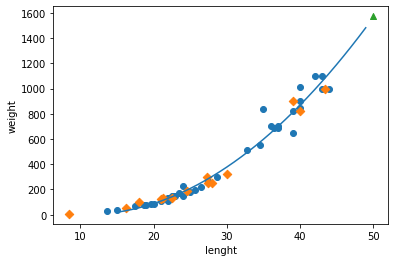

In [26]:
point = np.arange(15,50)
# print(point)
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target, marker='D')
plt.plot(point, 1.01*point**2 - 21.6*point+116.05) #2차 방정식
plt.scatter(50,1574,marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [27]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 테스트 세트 점수가 조금 높기 때문에 과소적합임.

0.9706807451768623
0.9775935108325122


- 가장 잘 맞는 직선의 방정식을 찾는다는 것은 최적의 기울기(coef_)와 절편(intercept_)을 구한다는 의미.
- 음수 리턴 해결하기 위해 다항 회귀 사용(2차 방정식)